#  Monte Carlo Stock price prediction

In [142]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

Getting asset's historical data ffrom yahoo finance

[*********************100%***********************]  1 of 1 completed
Date
2009-12-31    6.434926
2010-01-04    6.535085
2010-01-05    6.546383
2010-01-06    6.442256
2010-01-07    6.430344
Name: Adj Close, dtype: float64


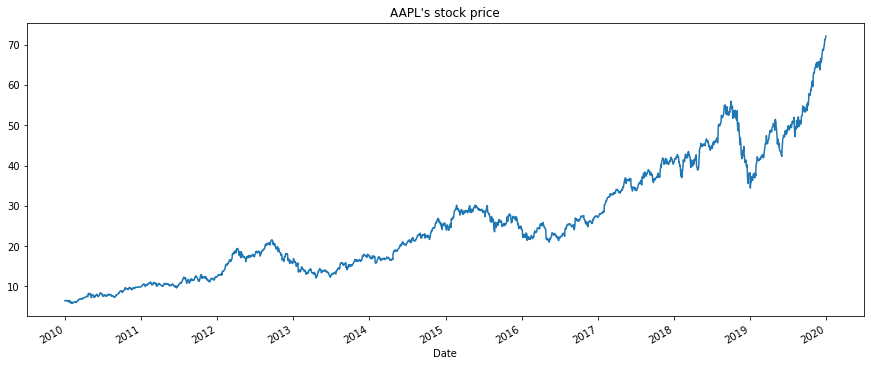

In [143]:
asset = ["AAPL"]
df = yf.download(asset, start="2010-01-01", end="2020-01-01")['Adj Close']
print(df.head())

################## plotting of stock price data #################
df.plot(figsize=(15,6))
plt.title(f"{asset[0]}'s stock price")
plt.show()

Here we are trying to simulate N days of price. So, we are considering some past day as Present time. At the last plot the vertical line represents the present time.

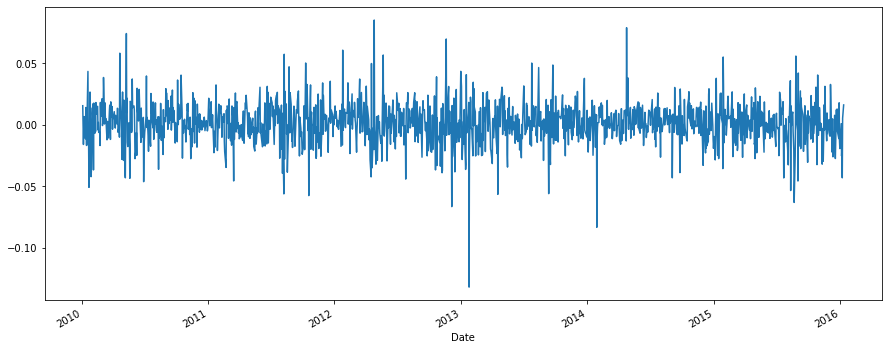

In [144]:
#################  slicing data from all past data  ############
N = 1000        #  we will be simulating last 1000 days of the history
data = df.iloc[0:-N]

######### plotting of daily log return  ################
log_return = np.log(data/data.shift(1))

log_return.plot(figsize=(15,6))
plt.show()

### Mathematical formula for Monte carlo pricing simulation 

$$ Price_{today} = Price_{yesterdaay}*e^{(\mu - 0.5\sigma^2) + \sigma Z} $$

In [145]:
################# Parameter calculations relevant to ##################
################# Monte carlo price simulation ########################

mu = log_return.mean()  # mean return
var = log_return.var()  # variance
sigma = log_return.std()# volatility

drift = mu - (0.5*var)  # drift 


# for every simulation we will sample N data points
iterations = 15  # we are performing 15 different simulations


#### calculation of Z and factor ############

z = norm.ppf(np.random.rand(N,iterations))
# z = norm.ppf(np.random.normal(mu,sigma,(t_intervals,iterations)))

factor = np.exp(drift + (sigma*z))

Initial price: 22.619386672973633
AAPL's price list of 15 simulation for 1000 day
 [[22.61938667 22.61938667 22.61938667 ... 22.61938667 22.61938667
  22.61938667]
 [22.77856764 22.56594349 23.00159335 ... 23.30222707 22.24947559
  22.39659059]
 [22.67488556 22.66888525 23.83893881 ... 23.42310427 22.42338256
  22.40038568]
 ...
 [58.54048544 49.18880728 41.24573844 ... 19.43231018 45.61947037
  49.92683284]
 [57.96176952 48.228271   41.30861138 ... 19.42532111 45.60317517
  50.34139809]
 [57.58514667 48.12382295 41.42066136 ... 18.91743639 46.42947169
  49.35030517]]


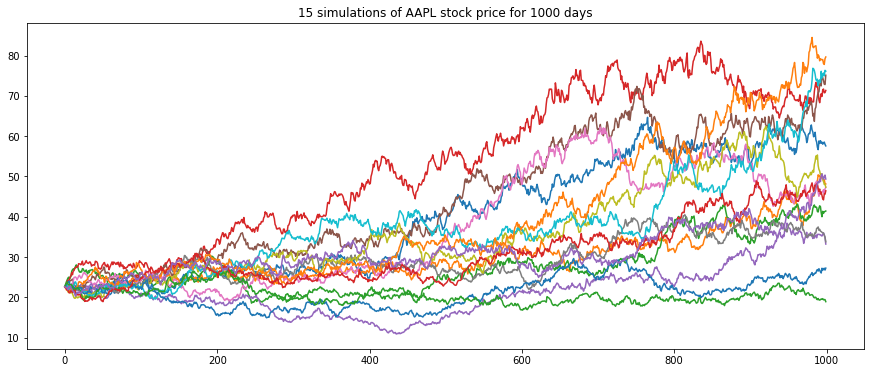

In [146]:
################ getting the price of today (fake present day) ###############
P0 = data.iloc[-1]
print("Initial price:",P0)

price_list = np.zeros(factor.shape)
price_list[0] = P0  # replaced the initial price on the 1st row


################## Simulation of Price with Monte Carlo ###########################

for t in range(1,N):
    price_list[t] = np.multiply(price_list[t-1],factor[t])  # element to element multiplication

print(f"{asset[0]}'s price list of {iterations} simulation for {N} day\n",price_list)


############  Plotting of simulation results  ###############

plt.figure(figsize=(15,6))
plt.title(f"{iterations} simulations of {asset[0]} stock price for {N} days")
plt.plot(price_list)
plt.show()

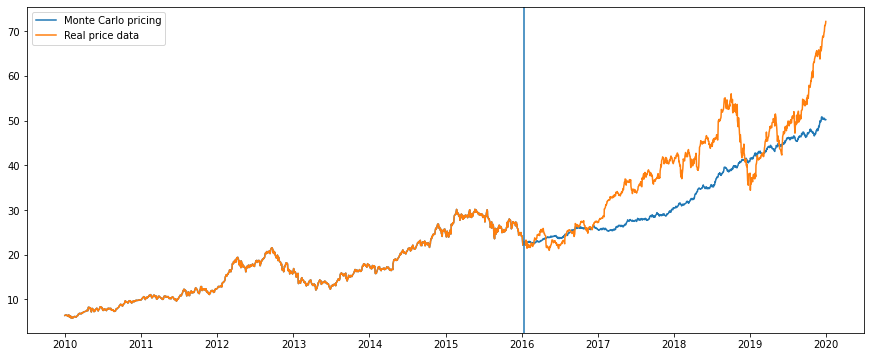

In [147]:
past_prices = data.values
future_prices = np.mean(price_list,axis=1)
all_prices = np.append(past_prices,future_prices)

x_axis = df.index.values
plt.figure(figsize=(15,6))
plt.plot(x_axis,all_prices)
plt.plot(x_axis,df.values)
plt.axvline(x= data.index[-1],label = "present")
plt.legend(["Monte Carlo pricing","Real price data"])
plt.show()